<a href="https://colab.research.google.com/github/Anshika0309/Anshika/blob/main/HandGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KGk6cLiL10MNokXHqmFR")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
dataset = project.version(12).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to Rock-Paper-Scissors-SXSW-12 in yolov8:: 100%|██████████| 23784/23784 [00:05<00:00, 4285.88it/s]


In [4]:
base_dir = '/content/Rock-Paper-Scissors-SXSW-12'
train_dir = os.path.join(base_dir, 'test')

In [3]:
import tensorflow as tf
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
from keras.callbacks import ReduceLROnPlateau

In [5]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest',
                validation_split=0.4)

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100,150),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = validation_datagen.flow_from_directory(
        train_dir,
        target_size=(100,150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 198 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


## Model Construction


In [6]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

In [10]:
# compile model with 'adam' optimizer and 'categorical_crossentropy' loss function
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction]
)


Epoch 1/10
7/7 [==============================] - 7s 688ms/step - loss: 0.1465 - accuracy: 0.8687 - val_loss: 4.3948e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
7/7 [==============================] - 5s 636ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.0521e-06 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
7/7 [==============================] - ETA: 0s - loss: 7.8737e-04 - accuracy: 1.0000
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
7/7 [==============================] - 4s 479ms/step - loss: 7.8737e-04 - accuracy: 1.0000 - val_loss: 1.0920e-07 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
7/7 [==============================] - 5s 634ms/step - loss: 2.5625e-04 - accuracy: 1.0000 - val_loss: 3.1850e-08 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 5/10
7/7 [==============================] - ETA: 0s - loss: 1.2632e-04 - accuracy: 1.0000
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
7/7 [======================

## Model Evaluation


In [12]:
# function evaluation plot for plotting accuracy and loss

def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

In [14]:
# function for model evaluation

def evaluate(model):

  validation_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(100,150),
          batch_size=32,
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_train_samples = 198
  num_of_test_samples = 131

  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['Rock', 'Paper', 'Scissors']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

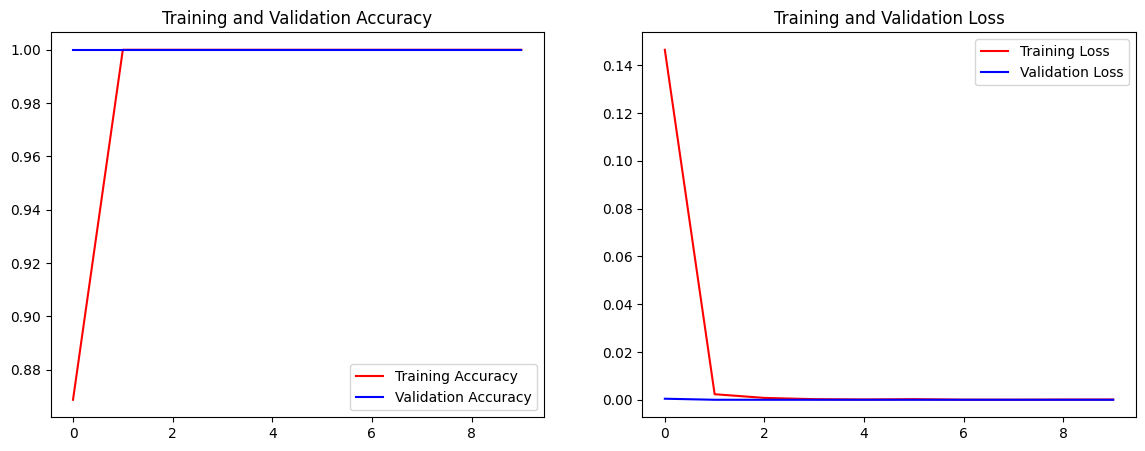

In [15]:
eval_plot(history)

In [16]:
evaluate(model)

Found 131 images belonging to 2 classes.


`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



Confusion Matrix

[[131]]


Classification Report



ValueError: ignored